# Aprendizagem de máquina e mineração de dados 

   **Implementação dos algoritmos da lista 1.** <br>
   Aluno: Eduardo José Tomé de Macedo <br>
   Professor: Adrião Duarte Dória Neto <br> 

   **Pacotes utilizados:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
mcsize = 1000 # Número de pontos da simulação de monte carlo

## Geração de números aleatórios

   Para demonstrar uma forma de gerar números pseudo-aleatórios com métodos computacionais, será utilizado o método congruente linear para gerar algumas distribuições comumente utilizadas.

### Função de geração 

   Os números pertencentes a $[0,1)$ serão gerados pelo método congruente linear, que é determinado pela seguinte formula recursiva:
   
   \begin{equation}
       x_n = ax_{n-1} + b \mod m 
   \end{equation}
   
   utilizando os parametros: <br>
   $a = 7 ** 5$ <br>
   $b = 0$ <br>
   $m = 2^{31} - 1$

Histograma dos numeros aleatórios no intervalo de 0 a 100:


(array([ 89., 103., 105., 101.,  96., 102.,  99., 103., 116.,  86.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

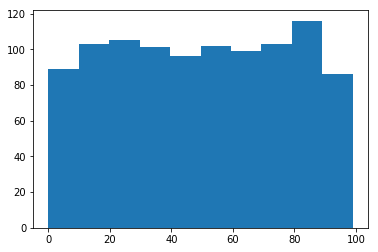

In [2]:
seed = 0

def sseed(x):
    global seed
    seed = x

def random():
    global seed
    a = int(7 ** 5)
    m = int(2 ** 31 - 1)
    q = m // a
    r = m % a
    value = a * (seed % q) - r * (seed // q)
    value += (m * (seed // q - a * seed // m))
    seed = value
    return value / (2 ** 31 - 1)

sseed(16307)

rands = [int(random() * 100) for x in range(1000)]
arr = np.array(rands)
print("Histograma dos numeros aleatórios no intervalo de 0 a 100:")
plt.hist(arr)

### Geração de distribuições 

   Após criar um gerador de números aleatórios no intervalo de $[0, 1)$ deseja-se gerar diferentes distribuições tomando como base esses valores.

### Distribuição exponencial

   Uma variável aleatória X possui distribuição exponencial se sua f.d.p. for dada por:
   
   \begin{equation}
     f(x) = \lambda e^{-\lambda x}
   \end{equation}
   
   Em que $\lambda$ é o número médio de ocorrências por unidade de tempo.
   
   Para gerar essa distribuição a seguinte fórmula pode ser utilizada:
   
   \begin{equation}
       X = -\lambda \ln{1 - R}
   \end{equation}

Histograma para a distribuição exponencial no intervalo de 0 a 100:


(array([436., 205., 149.,  88.,  51.,  33.,  14.,  14.,   3.,   7.]),
 array([  0. ,  16.2,  32.4,  48.6,  64.8,  81. ,  97.2, 113.4, 129.6,
        145.8, 162. ]),
 <a list of 10 Patch objects>)

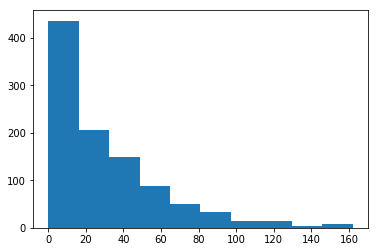

In [3]:
def rexp(lbda):
    return -lbda * np.log(random())

rexps = [int(rexp(0.3) * 100) for x in range(1000)]
print("Histograma para a distribuição exponencial no intervalo de 0 a 100:")
exparr = np.array(rexps)
plt.hist(exparr)

### Distribuição Gaussiana

Uma variavel aleatória X possui distribuição gaussiana representada por $X \sim N(\mu, \sigma^2)$ se sua f.d.p. for dada por:

\begin{equation}
    f(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}} ,  -\infty < x < \infty
\end{equation}

Onde $\mu$ é a média e $\sigma$ o desvio-padrão da população.

O método utilizado para gerar essa distribuição, baseado no Método de Box-Muller é mostrado abaixo:

Distribuição de probabilidade normal:


(array([  7.,  31.,  65., 148., 209., 225., 181.,  94.,  28.,  12.]),
 array([-3.02964104, -2.43703839, -1.84443573, -1.25183308, -0.65923042,
        -0.06662777,  0.52597488,  1.11857754,  1.71118019,  2.30378284,
         2.8963855 ]),
 <a list of 10 Patch objects>)

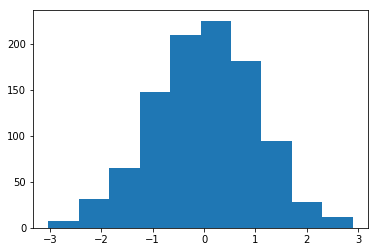

In [4]:
def normal(mi=0, sigma=1):
    return mi + sigma * np.sqrt(-2 * np.log(random())) * np.cos(2 * np.pi * random())

print("Distribuição de probabilidade normal:")
norms = [normal() for i in range(1000)]
normarr = np.array(norms)
plt.hist(normarr)

### Distribuição t-student

   A distribuição t-student é uma aproximação da distribuição gaussiana para amostras pequenas de uma população, assumida como aproximadamente normal, cujos paramêtros (média e variância) não sejam conhecidos. A aproximação é feita então pelo cálculo de $\bar{X}$ e $\hat{s}$ da amostra obtida.

   Uma variável aleatória X possui distribuição t-student caso sua f.d.p. seja dada por:
   
   \begin{equation}
       f(x) = \frac{\Gamma(\frac{\upsilon+1}{2})}{\sqrt{\upsilon\pi} \Gamma(\frac{\upsilon}{2})} (1 + \frac{x^2}{\upsilon})^{\frac{\upsilon + 1}{2}}
   \end{equation}
   
   Onde $\upsilon$ é o grau de liberdade e $\Gamma$ a função Gamma.
   
   Para gerar esta distribuição, a seguinte formula pode ser utilizada:
   
   \begin{equation}
       T = \frac{X_{k+1}}{\sqrt{k^{-1} \sum\limits_{i=0}^k{X_i^2}}}
   \end{equation}
   
   Onde $X_i$ é uma váriavel i.i.d. com $X \sim N(0,1)$ e k é o grau de liberdade.
  

Distribuição de probabilidade t-student:


(array([ 1.,  3.,  8.,  7., 15., 22., 17., 14.,  8.,  5.]),
 array([-2.67109561, -2.19800243, -1.72490925, -1.25181606, -0.77872288,
        -0.30562969,  0.16746349,  0.64055668,  1.11364986,  1.58674304,
         2.05983623]),
 <a list of 10 Patch objects>)

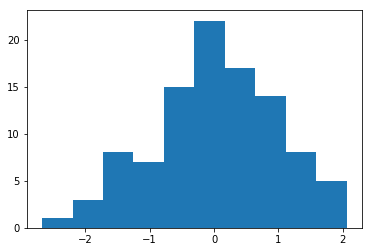

In [5]:
def tstudent(gl):
    num = normal()
    norms = [normal() for i in range(gl+1)]
    denarr = np.array(norms)
    den = np.sqrt(np.sum(denarr ** 2)/gl)
    return num / den

print("Distribuição de probabilidade t-student:")
tts = [tstudent(5) for i in range(100)]
tstdarr = np.array(tts)
plt.hist(tstdarr)

### Distribuição Qui-Quadrado

   Uma variável aleatória X possui distribuição Qui-Quadrado, representada por $X \sim \chi^2(\upsilon)$, quando sua f.d.p. é dada por:
   
   \begin{equation}
       f(x; \upsilon) = \frac{1}{2^{\upsilon/2} \Gamma(\upsilon/2)} x^{(\upsilon/2)-1} e^{-x/2}
   \end{equation}
   
   Onde $\upsilon$ é o grau de liberdade

## Simulações de Monte Carlo

   A simulação de monte carlo se baseia no fato de uma experança de uma função $h(X)$ de uma v.a. X, ser definida como:
   \begin{equation}
       E[h(x)] = \int_l^h{h(x)p(x)dx}
   \end{equation}

   Com $h(X)$ sendo a função da variavel aleatória e $p(X)$ sendo a distribuição de probabilidade.
   
   Então pode-se calcular a integral da função $h(X)$ através do valor estimado de sua média $\hat{X}$ para uma amostra grande de $X$, substituindo a função de probabilidade por $p(X) = 1$ com $X \sim U(l, h)$.
   
## Exemplos

### Simulação de monte carlo para:

   \begin{equation}
    I = \frac{1}{2\pi}\int_0^2{e^\frac{-x^2}{2}dx}
   \end{equation}

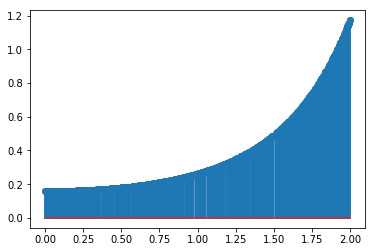

Resultado da Integração: 0.37882391860532605


In [6]:
# Simulação de monte carlo para f(x) = 1/2*pi int_0^2{e^x/2}

x = np.random.uniform(low=0, high=2, size=mcsize)  # Gera valores aleatórios no periodo de integração
y = 1.0 / (2.0 * np.pi) * np.exp((x ** 2)/ 2, dtype='float64')
result = np.mean(y)
plt.stem(x, y)
plt.show()
print("Resultado da Integração:",result)

### Simulação de monte carlo para:

   \begin{equation}
        I = \int_0^1{\int_0^1{e^{-(x^2+y^2)}dx}dy}
   \end{equation}

In [7]:
x2 = np.random.uniform(low=0, high=2, size=(2, mcsize))
values = np.exp(-(x2[0] ** 2 + x2[1] ** 2))
result = np.mean(values)
print("Resultado da integração:", result)

Resultado da integração: 0.18019347702762867


## Algoritmo Bayes Ingênuo

   O algoritmo Naive-Bayes tenta combater a necessidade de muitas informações em problemas de classificação com muitas dimensões. Para isso o algoritmo assume indepêndencia entre as características do vetor a ser analizado, tratando o problema como N problemas de 1 dimensão.
   
   O algoritmo se baseia na seguinte fórmula:
   
   \begin{equation}
       p(x \mid \omega_i) = \prod \limits_{j=1}^l p(x_j \mid \omega_i) , i = 1, 2, 3, ..., M
   \end{equation}
   
   Onde $M$ é o número de classes e $l$ o número de características.

In [19]:
import pandas as pd

data = [{"Casa Propria": "Sim", "Estado Civil": "Solteiro", "Rendimento": "Alto", "Mau Pagador": "Nao"},
        {"Casa Propria": "Nao", "Estado Civil": "Casado", "Rendimento": "Medio", "Mau Pagador": "Nao"},
        {"Casa Propria": "Sim", "Estado Civil": "Solteiro", "Rendimento": "Baixo", "Mau Pagador": "Nao"},
        {"Casa Propria": "Sim", "Estado Civil": "Casado", "Rendimento": "Alto", "Mau Pagador": "Nao"},
        {"Casa Propria": "Nao", "Estado Civil": "Divorciado", "Rendimento": "Medio", "Mau Pagador": "Sim"},
        {"Casa Propria": "Nao", "Estado Civil": "Casado", "Rendimento": "Baixo", "Mau Pagador": "Nao"},
        {"Casa Propria": "Sim", "Estado Civil": "Divorciado", "Rendimento": "Alto", "Mau Pagador": "Nao"},
        {"Casa Propria": "Nao", "Estado Civil": "Solteiro", "Rendimento": "Medio", "Mau Pagador": "Sim"},
        {"Casa Propria": "Nao", "Estado Civil": "Casado", "Rendimento": "Baixo", "Mau Pagador": "Nao"},
        {"Casa Propria": "Nao", "Estado Civil": "Solteiro", "Rendimento": "Medio", "Mau Pagador": "Sim"},
        {"Casa Propria": "Nao", "Estado Civil": "Divorciado", "Rendimento": "Medio"}]

print("Valores de treinamento do Naive-Bayes:")
frame = pd.DataFrame(data)
frame

Valores de treinamento do Naive-Bayes:


,Casa Propria,Estado Civil,Mau Pagador,Rendimento
0,Sim,Solteiro,Nao,Alto
1,Nao,Casado,Nao,Medio
2,Sim,Solteiro,Nao,Baixo
3,Sim,Casado,Nao,Alto
4,Nao,Divorciado,Sim,Medio
5,Nao,Casado,Nao,Baixo
6,Sim,Divorciado,Nao,Alto
7,Nao,Solteiro,Sim,Medio
8,Nao,Casado,Nao,Baixo
9,Nao,Solteiro,Sim,Medio


In [18]:
test = [{"Casa Propria": "Nao", "Estado Civil": "Casado", "Rendimento": "Alto", "Mau Pagador": "Nao"},
        {"Casa Propria": "Sim", "Estado Civil": "Solteiro", "Rendimento": "Medio", "Mau Pagador": "Nao"},
        {"Casa Propria": "Nao", "Estado Civil": "Divorciado", "Rendimento": "Baixo", "Mau Pagador": "Nao"},
        {"Casa Propria": "Sim", "Estado Civil": "Divorciado", "Rendimento": "Alto", "Mau Pagador": "Sim"},
        {"Casa Propria": "Nao", "Estado Civil": "Casado", "Rendimento": "Medio", "Mau Pagador": "Nao"}]

print("Valores de teste do Naive-Bayes:")
testframe = pd.DataFrame(test)
testframe

Valores de teste do Naive-Bayes:


,Casa Propria,Estado Civil,Mau Pagador,Rendimento
0,Nao,Casado,Nao,Alto
1,Sim,Solteiro,Nao,Medio
2,Nao,Divorciado,Nao,Baixo
3,Sim,Divorciado,Sim,Alto
4,Nao,Casado,Nao,Medio


In [22]:
def calc_priori_prob(dataset):
    probs = {}
    for column in dataset.columns.values:
        probseries = frame[column].value_counts() / frame[column].count()
        probs[column] = probseries
    return probs    

def naive_bayes(x, dataprob):
    """
    Calcula a probabilidade a posteriori de um vetor dada a classe descrita pelas probabilidades do conjunto de valores
    possíveis para cada caracteristica do vetor. Assume que as caracteristicas são independentes entre si.
    """
    result = 1
    for characteristic in x:
        result *= dataprob[characteristic].loc[x[characteristic]]
    return result

print("Probabilidades a posteriori dos valores de teste:\n")
result = calc_priori_prob(frame)
for vetor in testframe.to_dict('records'):
    post = naive_bayes(vetor, result)
    print(post)

Probabilidades a posteriori dos valores de teste:

0.044177310293012764
0.04207362885048835
0.03313298271975957
0.008114199849737038
0.07362885048835462
